<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Segment_Ajuste_mar_2021/Fig_05_BIG_Segmentation_abril_05_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
!pip install mahotas

In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)


In [10]:
print(df)

    Width           0           1  ...         781         782         783
0      89   58.013390   60.974880  ...   59.576569   59.775417   59.877419
1      99   87.042847   88.037033  ...  105.442711  105.828575  105.208847
2     158   87.664154   75.287300  ...   54.147888   65.614647   82.432465
3      72  102.475319  102.361107  ...   80.459885   80.049385   78.527786
4     157   50.605503   45.003571  ...  100.392685  108.841423  105.002228
5     123   71.876198  105.196182  ...  116.306435  107.299561   98.018845
6     191   61.804966   58.446182  ...   62.144707   30.105808   27.131931
7      91   37.692307   38.508877  ...    0.000000    0.000000    0.000000
8     147    8.512472    8.412699  ...   58.551022   56.378685   45.204082
9      70  116.120010  117.400002  ...   43.040001   44.240002   44.720001
10     93  109.405724  104.962891  ...   68.273445   67.398895   69.394966
11    120   73.264450   70.571114  ...  117.772217  132.252228  156.742218
12    123   92.804947   9

In [11]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
filename = 'model_ANN.pkl'
model = joblib.load(filename)

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [12]:
cont = 0; num =25
img_graos = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  del df['Width']
  result = np.array(df)/255
  prediction = model.predict(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

          0          1          2    ...        781        782        783
5    1.000000   0.186441   0.000000  ...   2.508187   2.484056   2.242746
12   1.991074   3.186446   3.277355  ...  30.767605  31.499834  30.231735
11   1.000000   1.133333   1.488889  ...  55.806915  58.180252  59.488892
31  29.515171  26.463415  23.195122  ...   0.000000   0.000000   0.000000
27   1.272727   1.570248   1.991736  ...  37.876034  44.487602  47.165291
43   0.000000   0.000000   0.000000  ...  11.412656  10.955112  10.928070
48   0.000000   0.000000   0.000000  ...  18.823530  18.937716  18.854671
6    0.000000   0.000000   0.117160  ...  87.470535  86.217278  85.443314
47   0.363636   0.363636   0.363636  ...  26.727274  27.008265  26.636364
7   10.764938  10.161482   9.888889  ...   0.000000   0.000000   0.000000
11   1.000000   0.333333   0.666667  ...  17.333334  17.333334  17.333334
29   0.000000   0.000000   0.224866  ...  66.172516  66.782272  65.791199
9    0.827160   0.654321   0.222222  .

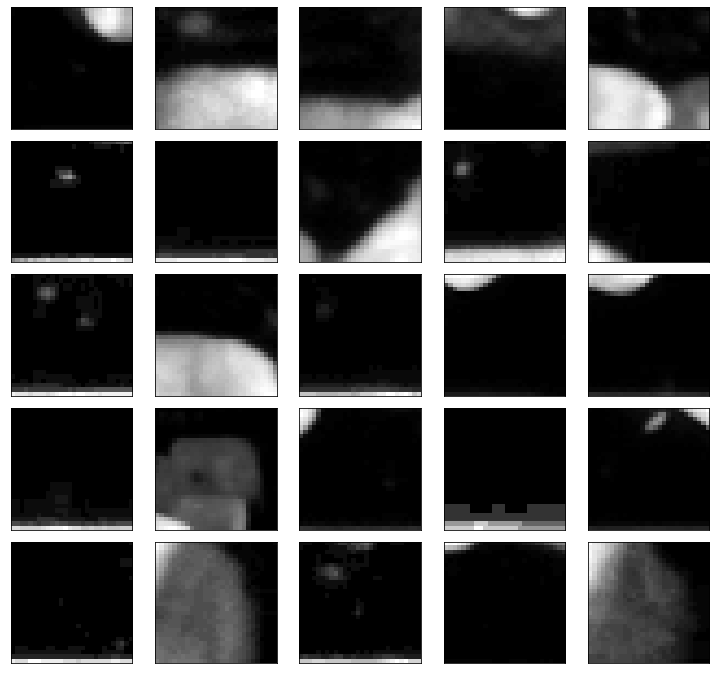

In [13]:
Num = 25
Size=28
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)
for i in range(Num):
  data=np.array(img_graos.iloc[i,:]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)

  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto=np.array(img28).reshape(28,28)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)
#plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)